In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../data/mediciones.csv')

# Exploracion

In [3]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


Vemos que hay diferente tipado en el dataset:

In [4]:
df.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


# Limpieza

Muchos de ellos deberemos pasarlos directamente a valores numéricos:


En primer lugar muchos números están expresados como cadenas de caracteres y con comas:

In [6]:
df.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

In [7]:
df[['distance', 'consume', 'temp_inside', 'refill liters']] = df[['distance', 'consume', 'temp_inside', 'refill liters']].apply(lambda x: x.str.replace(',','.'))

In [8]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,3.8,45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25,31,AC,SP98,1,0,0,NaN,NaN


In [9]:
df[['distance', 'consume', 'temp_inside', 'AC', 'rain', 'sun', 'refill liters']] = df[['distance', 'consume', 'temp_inside', 'AC', 'rain', 'sun', 'refill liters']].astype(float)

Tenemos ya nuestras variables numéricas en tipo correcto:

In [10]:
df.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC               float64
rain             float64
sun              float64
refill liters    float64
refill gas        object
dtype: object

# Vemos la columna "specials"

In [11]:
df.specials.value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC Sun                 1
AC sun                 1
ac rain                1
Name: specials, dtype: int64

In [12]:
df[~df.specials.isna()].sample(10)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
116,11.8,5.1,26,23.0,4,rain,SP98,0.0,1.0,0.0,NaN,NaN
378,16.2,4.4,39,24.5,17,ac,SP98,1.0,0.0,0.0,NaN,NaN
300,36.5,3.9,54,23.0,18,sun,SP98,0.0,0.0,1.0,NaN,NaN
311,10.8,4.7,48,22.0,17,sun,SP98,0.0,0.0,1.0,NaN,NaN
358,6.1,5.0,33,22.0,24,sun,SP98,0.0,0.0,1.0,NaN,NaN
319,216.1,5.3,90,22.0,21,sun,SP98,0.0,0.0,1.0,NaN,NaN
367,15.4,5.0,48,25.5,31,ac,SP98,1.0,0.0,0.0,NaN,NaN
227,19.0,5.1,53,22.5,4,rain,SP98,0.0,1.0,0.0,NaN,NaN
312,19.8,4.0,56,22.0,17,sun,SP98,0.0,0.0,1.0,NaN,NaN
86,13.2,4.3,51,20.0,11,rain,SP98,0.0,1.0,0.0,NaN,NaN


En la columan 'specials' no aparece 'nieve', generamos una coliumna dummy para ello

In [13]:
def nieve(x):
    try:
        if 'SNOW'in x.upper():
            return 1
        else: return 0
    except:
        return 0
        
df['snow']=df.specials.apply(nieve)
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,snow
0,28.0,5.0,26,21.5,12,NaN,E10,0.0,0.0,0.0,45.0,E10,0
1,12.0,4.2,30,21.5,13,NaN,E10,0.0,0.0,0.0,NaN,NaN,0
2,11.2,5.5,38,21.5,15,NaN,E10,0.0,0.0,0.0,NaN,NaN,0
3,12.9,3.9,36,21.5,14,NaN,E10,0.0,0.0,0.0,NaN,NaN,0
4,18.5,4.5,46,21.5,15,NaN,E10,0.0,0.0,0.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0.0,0.0,0.0,NaN,NaN,0
384,16.1,4.3,38,25.0,31,AC,SP98,1.0,0.0,0.0,NaN,NaN,0
385,16.0,3.8,45,25.0,19,NaN,SP98,0.0,0.0,0.0,NaN,NaN,0
386,15.4,4.6,42,25.0,31,AC,SP98,1.0,0.0,0.0,NaN,NaN,0


Aunque sólo sea para 4 días:

In [14]:
df.snow.value_counts()

0    384
1      4
Name: snow, dtype: int64

# Podemos "tirar" ya 'specials'
Parece que la columna special está aparentemente bien tabulada en las columnas de dummies correspondientes, así que podemos tirarla ahora que le hemos añadido el valor "nive".

In [15]:
df.drop('specials', axis=1, inplace=True)

In [16]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow
0,28.0,5.0,26,21.5,12,E10,0.0,0.0,0.0,45.0,E10,0
1,12.0,4.2,30,21.5,13,E10,0.0,0.0,0.0,NaN,NaN,0
2,11.2,5.5,38,21.5,15,E10,0.0,0.0,0.0,NaN,NaN,0
3,12.9,3.9,36,21.5,14,E10,0.0,0.0,0.0,NaN,NaN,0
4,18.5,4.5,46,21.5,15,E10,0.0,0.0,0.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0.0,0.0,0.0,NaN,NaN,0
384,16.1,4.3,38,25.0,31,SP98,1.0,0.0,0.0,NaN,NaN,0
385,16.0,3.8,45,25.0,19,SP98,0.0,0.0,0.0,NaN,NaN,0
386,15.4,4.6,42,25.0,31,SP98,1.0,0.0,0.0,NaN,NaN,0


Veamos cuántos datos del repostaje tenemos:

In [17]:
df[~df['refill gas'].isna()]

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow
0,28.0,5.0,26,21.5,12,E10,0.0,0.0,0.0,45.0,E10,0
44,5.4,3.3,32,21.5,7,SP98,0.0,0.0,0.0,37.6,SP98,0
82,10.5,3.6,42,20.0,10,SP98,0.0,0.0,0.0,37.7,SP98,0
106,162.7,5.5,75,23.0,1,SP98,0.0,0.0,0.0,45.0,SP98,0
139,16.1,5.4,24,21.5,7,E10,0.0,1.0,0.0,38.0,E10,0
171,44.4,4.8,38,21.5,8,E10,0.0,0.0,0.0,38.3,E10,0
191,43.7,4.7,44,22.0,9,SP98,0.0,1.0,0.0,10.0,SP98,0
192,12.1,4.2,43,22.0,4,SP98,0.0,0.0,0.0,39.0,SP98,0
234,19.0,4.5,29,22.5,10,E10,0.0,0.0,0.0,39.0,E10,0
274,25.7,4.9,50,22.0,10,SP98,0.0,1.0,0.0,41.0,SP98,0


In [18]:
len(df[~df['refill gas'].isna()])

13

In [19]:
df[~df['refill gas'].isna()][['refill gas', 'gas_type']]


,refill gas,gas_type
0,E10,E10
44,SP98,SP98
82,SP98,SP98
106,SP98,SP98
139,E10,E10
171,E10,E10
191,SP98,SP98
192,SP98,SP98
234,E10,E10
274,SP98,SP98


Solo ha apuntado 13 repostajes con sus datos correspondientes. Estos datos podemos decir que se han tomado según las condiciones que nos indican:

"Si el coche no se estaba enfriando lo suficiente como para tener otra medida independiente de la anterior, no lo anoto."

Esto nos lleva a pensar que realmente el coche no para de trabajar prácitcamente entre desplazamiento y desplazamiento.


In [20]:
df['cooling']= ~df['refill gas'].isna()

df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow,cooling
0,28.0,5.0,26,21.5,12,E10,0.0,0.0,0.0,45.0,E10,0,True
1,12.0,4.2,30,21.5,13,E10,0.0,0.0,0.0,NaN,NaN,0,False
2,11.2,5.5,38,21.5,15,E10,0.0,0.0,0.0,NaN,NaN,0,False
3,12.9,3.9,36,21.5,14,E10,0.0,0.0,0.0,NaN,NaN,0,False
4,18.5,4.5,46,21.5,15,E10,0.0,0.0,0.0,NaN,NaN,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0.0,0.0,0.0,NaN,NaN,0,False
384,16.1,4.3,38,25.0,31,SP98,1.0,0.0,0.0,NaN,NaN,0,False
385,16.0,3.8,45,25.0,19,SP98,0.0,0.0,0.0,NaN,NaN,0,False
386,15.4,4.6,42,25.0,31,SP98,1.0,0.0,0.0,NaN,NaN,0,False


# Agrupamos las jornadas


# 🚨 DESCARTAMOS ESTA OPCIÓN PERO DEJAMOS LOS CÁLCULOS EN ESTE JUPYTER POR NO TIRAR CÓDIGO
En el data set se diferencia el momento en el que el vehículo ha tenido suficientemente tiempo para enfriarse. Considaremos que entre uno y otro ha habido un cambio de jornada. En el resto entendemos que el coche continua trabajando.

In [21]:
#Podemos ver el inicio y fin de cada fila de la jornada.
inicio=list(df[df.cooling].index)
fin=inicio[1:]
fin.append(len(df))
inicio=[x+1 for x in inicio]
inicio[0]=0
inicio

[0, 45, 83, 107, 140, 172, 192, 193, 235, 275, 314, 326, 350]

In [22]:
fin

[44, 82, 106, 139, 171, 191, 192, 234, 274, 313, 325, 349, 388]


Jornada
Damos extraemos la jornada a la que pertemece cada recorrido

In [23]:

 df['jornada']=0
for j, (i,f) in enumerate(zip(inicio,fin)):
    df.loc[i:f,'jornada']=j+1

In [24]:
df.jornada

0       1
1       1
2       1
3       1
4       1
       ..
383    13
384    13
385    13
386    13
387    13
Name: jornada, Length: 388, dtype: int64

In [25]:
max_jornadas = df.jornada.max()
df['km_recorridos']=0

for j in range(1,max_jornadas+1):
    df.km_recorridos[df.jornada == j] = df[df.jornada == j].distance.cumsum();

<ipython-input-25-ce11ab9b0af8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.km_recorridos[df.jornada == j] = df[df.jornada == j].distance.cumsum();
<ipython-input-25-ce11ab9b0af8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.km_recorridos[df.jornada == j] = df[df.jornada == j].distance.cumsum();
<ipython-input-25-ce11ab9b0af8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.km_recorridos[df.jornada == j] = df[df.jorn

# Columna Km_recorridos.
Podemos ver como ahora cada viaje tiene una columa más con los  kilómetros acumulados desde la última vez que el coche paró. Por lo tanto entendemos que todos estos trayectos pertenecen a la misma jornada.

In [26]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow,cooling,jornada,km_recorridos
0,28.0,5.0,26,21.5,12,E10,0.0,0.0,0.0,45.0,E10,0,True,1,28.0
1,12.0,4.2,30,21.5,13,E10,0.0,0.0,0.0,NaN,NaN,0,False,1,40.0
2,11.2,5.5,38,21.5,15,E10,0.0,0.0,0.0,NaN,NaN,0,False,1,51.2
3,12.9,3.9,36,21.5,14,E10,0.0,0.0,0.0,NaN,NaN,0,False,1,64.1
4,18.5,4.5,46,21.5,15,E10,0.0,0.0,0.0,NaN,NaN,0,False,1,82.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0.0,0.0,0.0,NaN,NaN,0,False,13,513.4
384,16.1,4.3,38,25.0,31,SP98,1.0,0.0,0.0,NaN,NaN,0,False,13,529.5
385,16.0,3.8,45,25.0,19,SP98,0.0,0.0,0.0,NaN,NaN,0,False,13,545.5
386,15.4,4.6,42,25.0,31,SP98,1.0,0.0,0.0,NaN,NaN,0,False,13,560.9


In [27]:
# Hasta aquí cálculo de km_recorrido, entendemos que podemos tirar esta columa
df.drop('km_recorridos', axis=1, inplace=True)

# Drop Columnas redudantes
Ahora la columna refill_gas no apota ningún tipo de información .
Algo parecido podemos considerar con refill_liters, no parece que sea de interés cuántos litros ha echado.
Como tenemos 'km_recorridos' podemos desechar "joranada" y 'cooling'

In [28]:
df.drop('refill liters', axis=1, inplace=True)
df.drop('refill gas', axis=1, inplace=True)
df.drop('cooling', axis=1, inplace=True)
df.drop('jornada', axis=1, inplace=True)


¿Qué hacer con la temperatura? Hechemos un vistazo al¡ la distribución de la tempratura interior.

<AxesSubplot:>

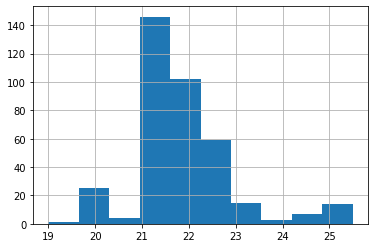

In [29]:
df.temp_inside.hist()

y la exterior

<AxesSubplot:>

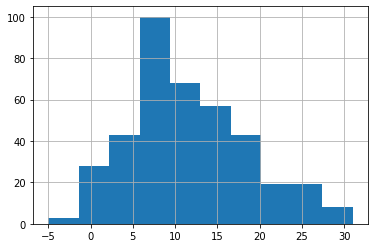

In [30]:
df.temp_outside.hist()

Suponemos qeu la temperatura interior no es determinante, además está directamete relacionada con el uso o no de AC.

En cambio, aunque no somos expertos en otores, consultamos en web y encontramos:

https://www.nrcan.gc.ca/sites/www.nrcan.gc.ca/files/oee/pdf/transportation/fuel-efficient-technologies/autosmart_factsheet_3_e.pdf

"Cold weather causes higher fuel consumption.  The U.S. Environmental Protection Agency (EPA) estimates that a drop in temperature from 24°C to 7°C can increase fuel consumption in urban commutes by 12 to 28%"

Nos pod

In [31]:
#df.drop('temp_inside', axis=1, inplace=True)

In [32]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,snow
0,28.0,5.0,26,21.5,12,E10,0.0,0.0,0.0,0
1,12.0,4.2,30,21.5,13,E10,0.0,0.0,0.0,0
2,11.2,5.5,38,21.5,15,E10,0.0,0.0,0.0,0
3,12.9,3.9,36,21.5,14,E10,0.0,0.0,0.0,0
4,18.5,4.5,46,21.5,15,E10,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0.0,0.0,0.0,0
384,16.1,4.3,38,25.0,31,SP98,1.0,0.0,0.0,0
385,16.0,3.8,45,25.0,19,SP98,0.0,0.0,0.0,0
386,15.4,4.6,42,25.0,31,SP98,1.0,0.0,0.0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   376 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    float64
 7   rain          388 non-null    float64
 8   sun           388 non-null    float64
 9   snow          388 non-null    int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 30.4+ KB


In [33]:
df.to_csv('../data/data_clean.csv', index=False)  